In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df.shape

(334, 7)

In [8]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


In [11]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df[df['species'] == 'Gentoo'].groupby('sex').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
.,44.500000,15.700000,217.000000,4875.000000
FEMALE,45.563793,14.237931,212.706897,4679.741379
MALE,49.473770,15.718033,221.540984,5484.836066


In [13]:
df.at[336, 'sex'] = 'FEMALE'

In [14]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


<AxesSubplot:>

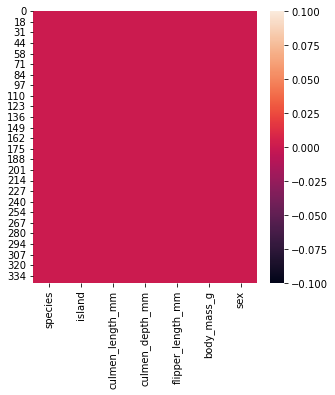

In [15]:
plt.figure(figsize = (5,5))
sns.heatmap(df.isnull())

In [16]:
df.duplicated().sum()

0

In [17]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


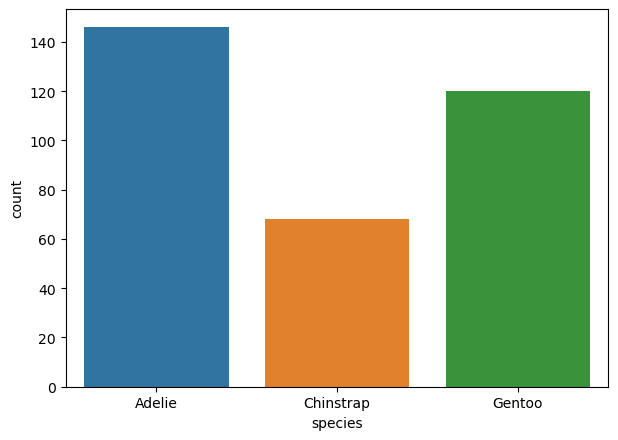

In [18]:
plt.figure(figsize = (7,5), dpi = 100)
sns.countplot(data = df, x ='species');

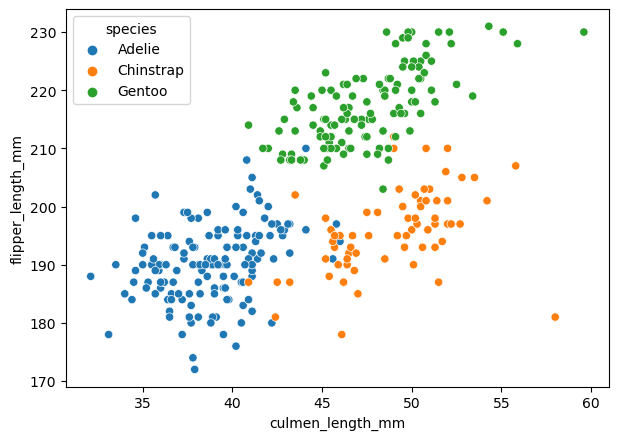

In [19]:
plt.figure(figsize = (7,5), dpi = 100)
sns.scatterplot(data = df, x = 'culmen_length_mm', y = 'flipper_length_mm', hue = 'species');

<Figure size 700x500 with 0 Axes>

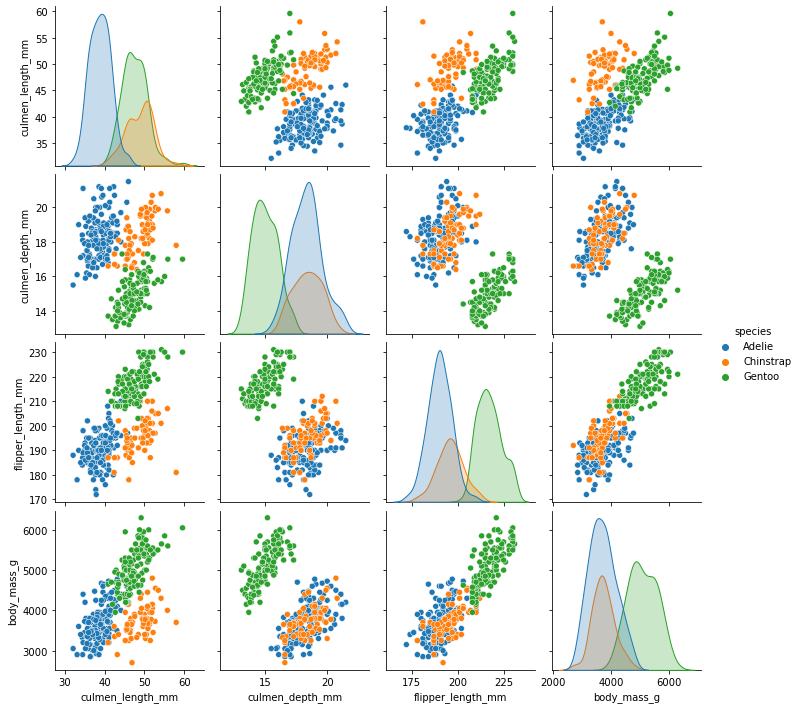

In [20]:
plt.figure(figsize = (7,5), dpi = 100)
sns.pairplot(df, hue = 'species')

In [21]:
df['sex'].replace(to_replace = ['MALE', 'FEMALE'],value = [1,0], inplace = True)

In [22]:
island = pd.get_dummies(df['island'], drop_first = True)

In [23]:
df = pd.concat([df, island], axis =1)

In [24]:
df.drop('island', axis =1 ,inplace = True)

In [25]:
X = df.drop('species', axis =1)

In [26]:
y = df['species']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [28]:
model1 = DecisionTreeClassifier()

In [29]:
param = {'criterion': ['gini', 'entropy'],
         'max_depth': [2 ,3 ,4],
         'max_features': ['auto', 'sqrt', 'log2'],
         'min_impurity_decrease': [0.05, 0.1, 0, 0.5, 1],
         'min_samples_split': [2, 3],
         'max_leaf_nodes': [2,3,4,5,6,7,9,10,12]}

In [30]:
grid = GridSearchCV(estimator = model1, param_grid = param,cv =3)

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 9, 10, 12],
                         'min_impurity_decrease': [0.05, 0.1, 0, 0.5, 1],
                         'min_samples_split': [2, 3]})

In [32]:
grid_pred = grid.predict(X_test)

<Figure size 504x360 with 0 Axes>

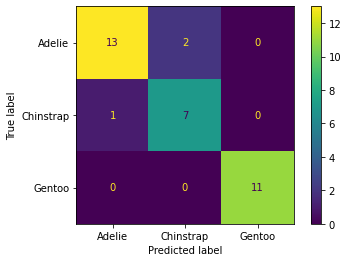

In [33]:
plt.figure(figsize = (7,5))
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test);

In [34]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

      Adelie       0.93      0.87      0.90        15
   Chinstrap       0.78      0.88      0.82         8
      Gentoo       1.00      1.00      1.00        11

    accuracy                           0.91        34
   macro avg       0.90      0.91      0.91        34
weighted avg       0.92      0.91      0.91        34



In [35]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0,
 'min_samples_split': 2}

### Main Model

In [37]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth = 4,max_features= 'auto',max_leaf_nodes= 10,min_impurity_decrease= 0,min_samples_split= 2)

In [38]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto', max_leaf_nodes=10,
                       min_impurity_decrease=0)

In [39]:
tree_pred = model.predict(X_test)

<Figure size 504x360 with 0 Axes>

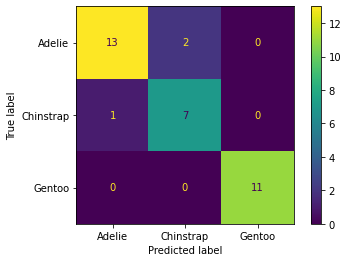

In [40]:
plt.figure(figsize = (7,5))
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test);

In [42]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

      Adelie       0.93      0.87      0.90        15
   Chinstrap       0.78      0.88      0.82         8
      Gentoo       1.00      1.00      1.00        11

    accuracy                           0.91        34
   macro avg       0.90      0.91      0.91        34
weighted avg       0.92      0.91      0.91        34



In [43]:
model.feature_importances_

array([0.        , 0.64602384, 0.18068278, 0.00610844, 0.        ,
       0.16718494, 0.        ])

In [45]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'Dream', 'Torgersen'],
      dtype='object')

In [52]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values(by = 'Feature Importance')

,Feature Importance
culmen_length_mm,0.000000
sex,0.000000
Torgersen,0.000000
body_mass_g,0.006108
Dream,0.167185
flipper_length_mm,0.180683
culmen_depth_mm,0.646024


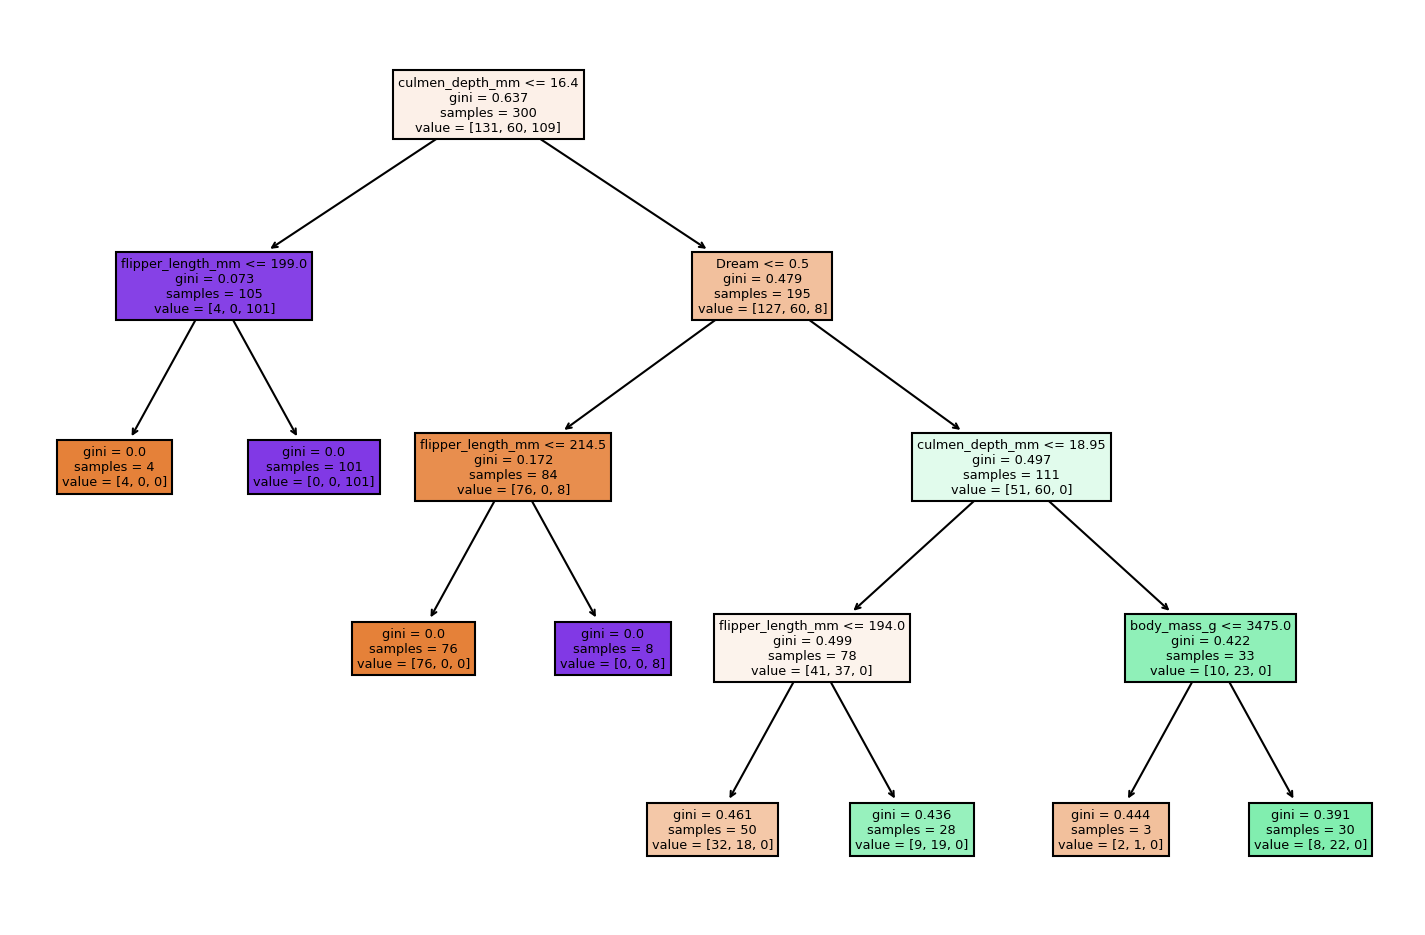

In [56]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);